In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from copy import deepcopy

from qibo.backends import construct_backend
from qibo import hamiltonians, Circuit, gates, set_backend
from qibo import gates, symbols
from qibo.gates import Unitary, CNOT, CZ
from qibo.symbols import X, Y, Z
from qibo import hamiltonians
from qibo.hamiltonians import Hamiltonian, SymbolicHamiltonian

from db_doi.group_commutator_iteration import GroupCommutatorIteration, DoubleBracketRotationApproximationType
from db_doi.utils_XXZ_compilation import *

/home/marek/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


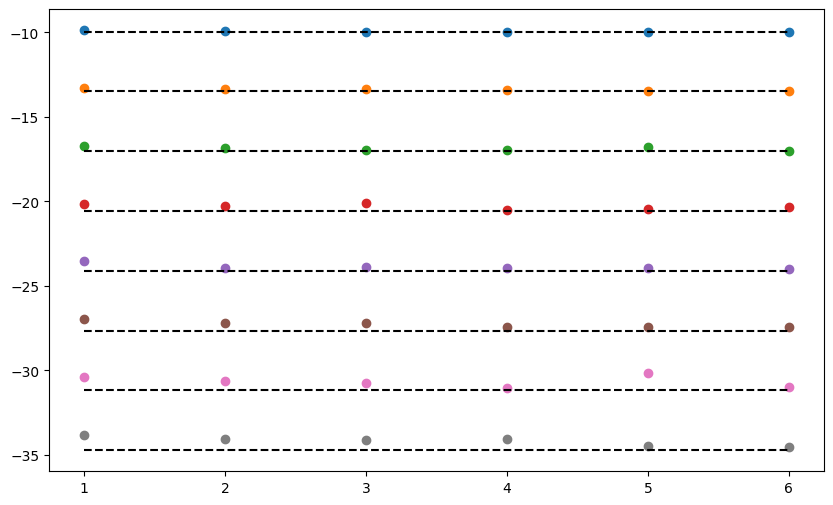

In [2]:
from db_doi.utils_reporting import load_data, loading_simulation_data_path

def fidelity_witness(E,E0,E1):
        return 1 - (E-E0)/(E1-E0)

plt.figure(figsize=(10, 6))
E_HVA_L = {}
E0_L = {}
E1_L = {}
F_W_L = {}
for L in [6,8,10,12,14,16,18,20]:
    data_collection = load_data(loading_simulation_data_path() + f"XXZ_HVA_data_L{L}")
    E_HVA_L_n = []
    E0_L[L] = data_collection["E0"]
    E1_L[L] = data_collection["E1"]
    for nlayers in range(1,6+1):
        E_HVA_L_n.append(data_collection[f"HVA_Nlayers_{nlayers}"]["E_HVA"])
    plt.plot(np.arange(1,7), E_HVA_L_n, 'o', label=f'Nlayers={nlayers}')
    plt.plot(np.arange(1,7), [E0_L[L]]*6, 'k--', label='E0')  
    E_HVA_L[L] = E_HVA_L_n 
    F_W_L[L] = [fidelity_witness(e,E0_L[L],E1_L[L]) for e in E_HVA_L[L]]

from db_doi.utils_reporting import save_data, loading_simulation_data_path
Ls = [6,8,10,12,14,16,18,20]

save_data({
    'E0_L': E0_L, "E_HVA_L": E_HVA_L, 
    "Ls": Ls,
    "F_W_L" : F_W_L
    }, loading_simulation_data_path() + f"energies")

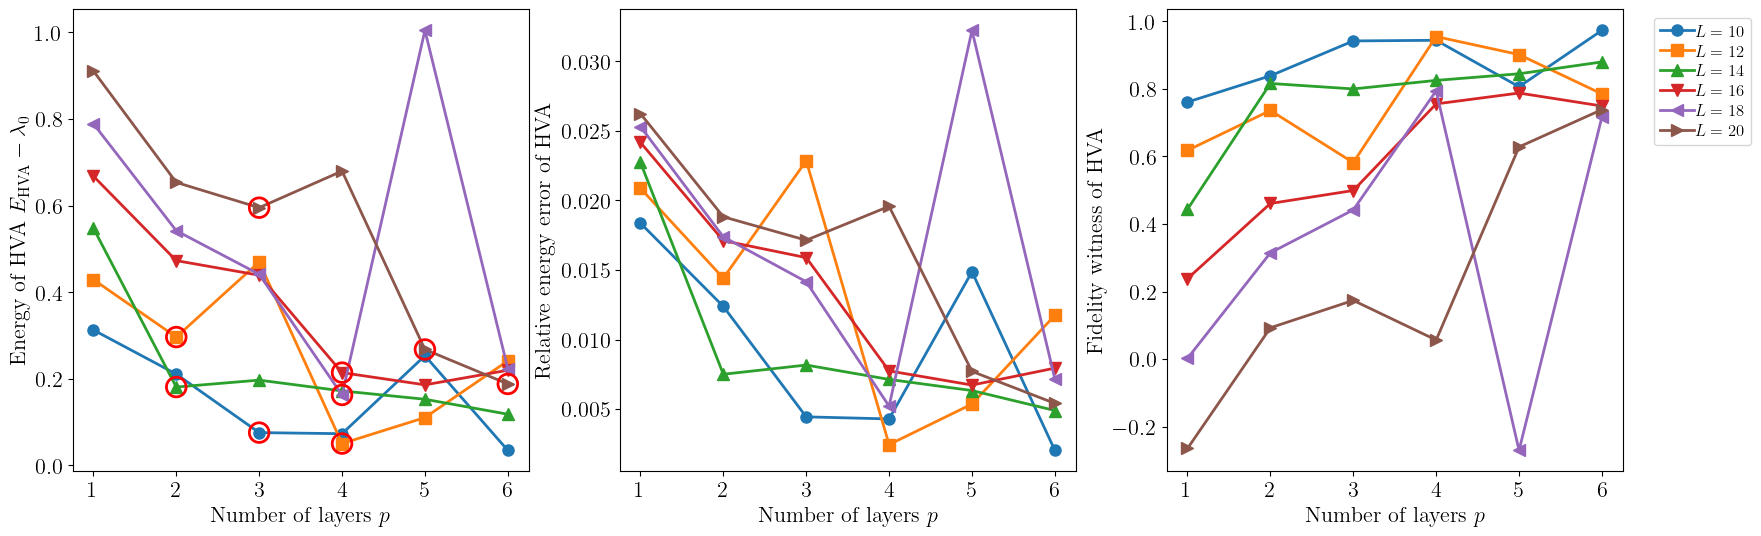

In [15]:
from db_doi.utils_reporting import run_param_rc
run_param_rc(16)


fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20, 6), 
                                     gridspec_kw={"width_ratios": [1, 1,1], "height_ratios": [1]})
markers = ['o', 's', '^', 'v', '<', '>', 'd']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i,L in enumerate(Ls[2:]):

        steps = [1,2,3,4,5,6]
        ax0.plot(steps, E_HVA_L[L]-E0_L[L], color=colors[i], marker=markers[i], linestyle='solid', label = rf"$L={L}$")
        ax0.set_xlabel(r"Number of layers $p$")
        ax0.set_ylabel(r"Energy of HVA $E_{\mathrm{HVA}}-\lambda_0$")

        ax1.plot(steps, abs(E_HVA_L[L]- E0_L[L])/abs(E0_L[L]), color=colors[i], marker=markers[i], linestyle='solid', label = rf"$L={L}$")
        ax1.set_xlabel(r"Number of layers $p$")
        ax1.set_ylabel(r"Relative energy error of HVA")

        ax2.plot(steps, F_W_L[L], color=colors[i], marker=markers[i], linestyle='solid', label = rf"$L={L}$")
        ax2.set_xlabel(r"Number of layers $p$")
        ax2.set_ylabel(r"Fidelity witness of HVA")       
        ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

selected_circuits =[
        {"L": 10, "p": 3, "E": E_HVA_L[10][2]},
        {"L": 12, "p": 2, "E": E_HVA_L[12][1]},
        {"L": 12, "p": 4, "E": E_HVA_L[12][3]},
        {"L": 14, "p": 2, "E": E_HVA_L[14][1]},
        {"L": 16, "p": 4, "E": E_HVA_L[16][3]},
        {"L": 18, "p": 4, "E": E_HVA_L[18][3]},
        {"L": 20, "p": 5, "E": E_HVA_L[20][4]},
        {"L": 20, "p": 3, "E": E_HVA_L[20][2]},
        {"L": 20, "p": 6, "E": E_HVA_L[20][5]},
]
save_data(selected_circuits, loading_simulation_data_path() + f"selected_HVA_circuits")
for selection  in selected_circuits:
        ax0.scatter(selection["p"], selection["E"]-E0_L[selection["L"]],
                facecolors='none',   # No fill inside the circle
                edgecolors='red',    # Red outline for the circle
                marker='o',          # Circle marker
                s=200,               # Size of the circle (adjust as needed)
                linewidth=2,         # Thickness of the circle's outline
                zorder=5)            # Ensure it's drawn on top
plt.savefig("pdfs_figures/HVA_overview.pdf")

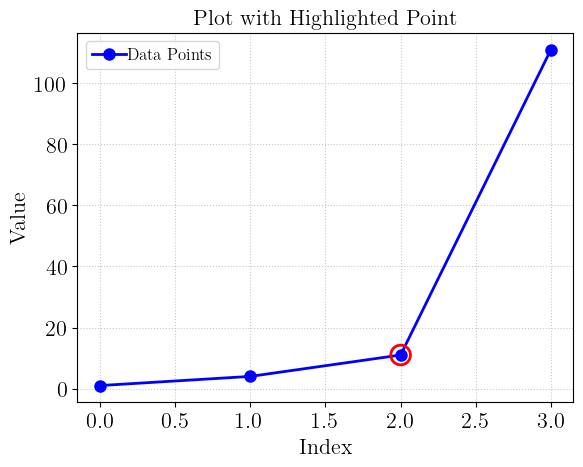

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = [1, 4, 11, 111]
x_coords = np.arange(len(data)) # x-coordinates for the data points

# --- 1. Plot the main line ---
plt.plot(x_coords, data, marker='o', linestyle='-', color='blue', label='Data Points')

# --- 2. Identify the point to highlight ---
# The value 11 is at index 2 in the 'data' list.
# So, its x-coordinate is 2 and its y-coordinate is 11.
highlight_x = x_coords[2]
highlight_y = data[2]

# --- 3. Draw an open circle around the selected point ---
plt.scatter(highlight_x, highlight_y,
            facecolors='none',   # No fill inside the circle
            edgecolors='red',    # Red outline for the circle
            marker='o',          # Circle marker
            s=200,               # Size of the circle (adjust as needed)
            linewidth=2,         # Thickness of the circle's outline
            zorder=5)            # Ensure it's drawn on top

# --- Add labels and title for clarity ---
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot with Highlighted Point')
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.show()

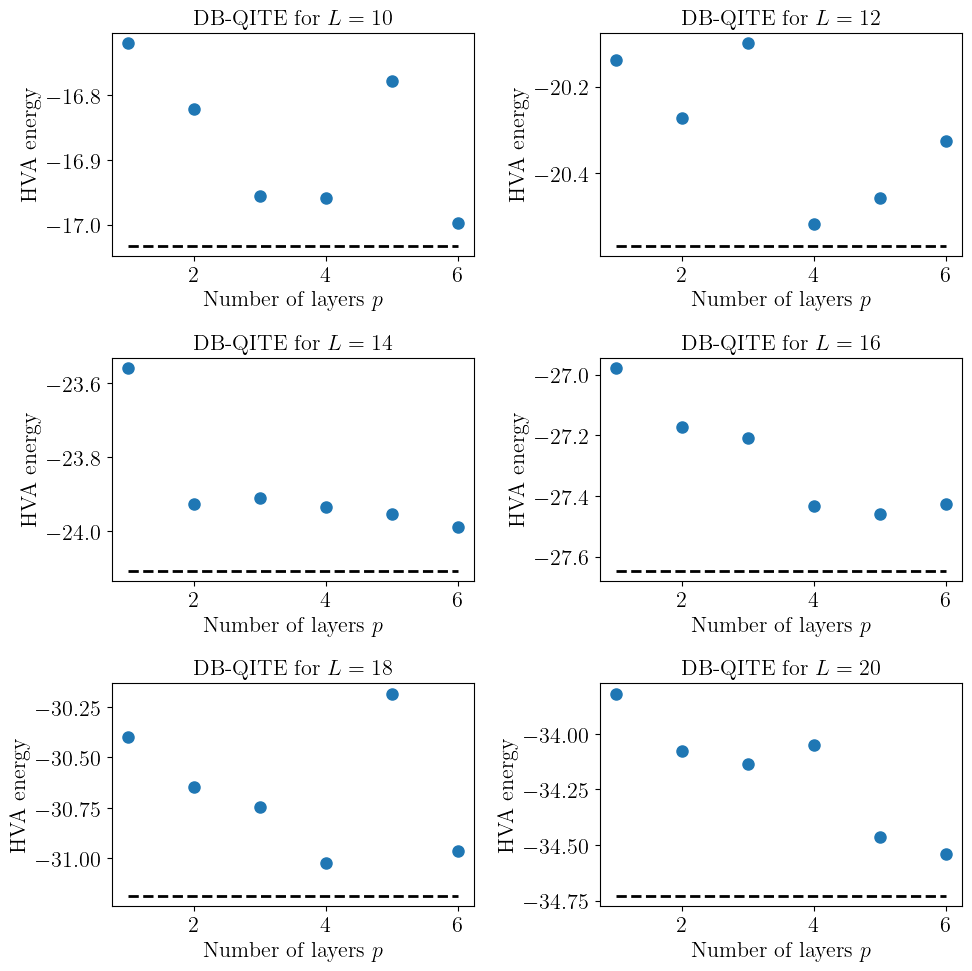

In [4]:

# Create a figure with 6 subplots (3 rows, 2 columns)
fig, ((ax_10, ax_12), 
      (ax_14, ax_16), 
      (ax_18, ax_20)) = plt.subplots(3, 2, figsize=(10, 10), 
                                     gridspec_kw={"width_ratios": [1, 1], "height_ratios": [1,1,1]})
def plot_HVA_results(ax,L):
        steps = [1,2,3,4,5,6]
        ax.plot(steps, E_HVA_L[L], 'o', label=f'Nlayers={nlayers}')
        ax.plot(steps, [E0_L[L]]*6, 'k--', label='E0')   
        ax.set_xlabel(r"Number of layers $p$")
        ax.set_ylabel(r"HVA energy")
        #ax.set_xticks(ticks = range(0, 6, 1))
        #ax.set_yticks(ticks = [-30,-31,-32,-33, -34,-35])
        #ax.legend(loc="center right", fontsize=15)
        ax.set_title(f"DB-QITE for $L={L}$")
plot_HVA_results(ax_10, 10)
plot_HVA_results(ax_12, 12)
plot_HVA_results(ax_14, 14)
plot_HVA_results(ax_16, 16)
plot_HVA_results(ax_18, 18)
plot_HVA_results(ax_20, 20)

plt.tight_layout()
#plt.savefig("plots/QITE_Heisenberg.pdf")
plt.show()

